Class assignment(https://www.dataquest.io/)

Data source: https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
#Read data
mpg = pd.read_table("auto-mpg.data", delim_whitespace=True)

In [9]:
#Read data and set column names for dataframe
columns = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model year", "origin", "car name"]

cars = pd.read_table("auto-mpg.data", delim_whitespace=True, names=columns)

In [10]:
#Initial inspection
print(cars.head(5))

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   
3  16.0          8         304.0      150.0  3433.0          12.0          70   
4  17.0          8         302.0      140.0  3449.0          10.5          70   

   origin                   car name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


# What affects fuel efficiencies

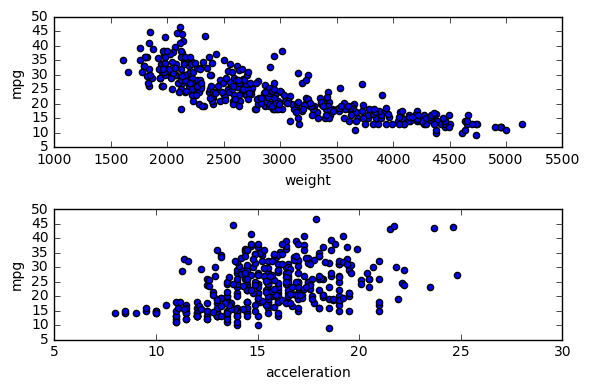

In [27]:
#Exploratory plot: weight and acceleration vs mpg
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
cars.plot("weight", "mpg", kind='scatter', ax=ax1)
cars.plot("acceleration", "mpg", kind='scatter', ax=ax2)
plt.tight_layout()
plt.show()

In [18]:
#Fit linear regression model with sklearn
import sklearn
from sklearn.linear_model import LinearRegression
lr = LinearRegression(fit_intercept=True)
lr.fit(cars[["weight"]], cars["mpg"])
predictions = lr.predict(cars[["weight"]])
print(predictions[0:5])
print(cars["mpg"][0:5])

[ 19.41852276  17.96764345  19.94053224  19.96356207  19.84073631]
0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64


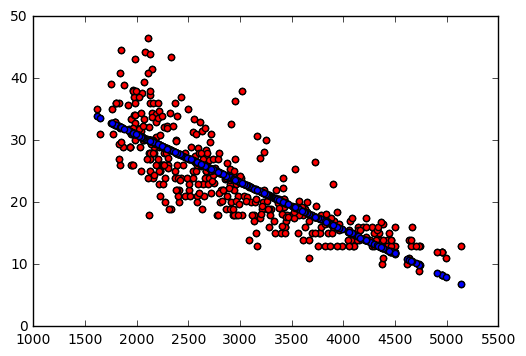

In [20]:
#Plot predictions
plt.scatter(cars["weight"], cars["mpg"], c='red')
plt.scatter(cars["weight"], predictions, c='blue')
plt.show()

In [30]:
#MSE and RMSE of Predictions
predictions = lr.predict(cars[["weight"]])
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(cars["mpg"], predictions)
print('MSE:',mse)
rmse = mse **0.5
print ('RMSE:', rmse)

MSE: 18.7809397346
RMSE: 4.33369815915
